In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.datasets import fashion_mnist

In [2]:
(train_images,train_labels),(test_images,test_labels) = fashion_mnist.load_data()

In [3]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


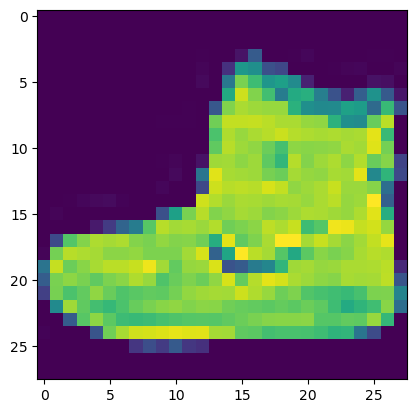

In [4]:
plt.imshow(train_images[0])

In [5]:
print(train_labels[0])

9


In [6]:
train_images = train_images/255

In [7]:
test_images = test_images/255

In [8]:
def FM_model():
    model = keras.Sequential([keras.layers.Input(shape = (28,28,1)),
                             keras.layers.Conv2D(64,(3,3),activation = 'relu'),
                             keras.layers.MaxPooling2D(2,2),
                             keras.layers.Conv2D(32,(3,3),activation = 'relu'),
                             keras.layers.MaxPooling2D(2,2),
                             keras.layers.Flatten(),
                             keras.layers.Dense(128,activation = 'relu'),
                             keras.layers.Dense(64,activation = 'relu'),
                             keras.layers.Dense(10, activation = 'sigmoid')],
                            name = 'model_cnn')
    model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])
    return model
    

In [9]:
model = FM_model()
model.summary()

Model: "model_cnn"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 800)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         102,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 130,538 (509.91 KB)

 Trainable params: 130,538 (509.91 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
history = model.fit(train_images,train_labels,epochs = 10, shuffle = True)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 47s 22ms/step - accuracy: 0.7586 - loss: 0.6636
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 23ms/step - accuracy: 0.8810 - loss: 0.3232
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 46s 24ms/step - accuracy: 0.8961 - loss: 0.2788
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 24ms/step - accuracy: 0.9097 - loss: 0.2411
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 22ms/step - accuracy: 0.9204 - loss: 0.2148
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 23ms/step - accuracy: 0.9257 - loss: 0.1962
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 52s 28ms/step - accuracy: 0.9341 - loss: 0.1753
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 26ms/step - accuracy: 0.9411 - loss: 0.1581
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 48s 26ms/step - accuracy: 0.9443 - loss: 0.1448
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 89s 29ms/step - accuracy: 0.9505 - loss: 0.1325


In [11]:
model.evaluate(test_images,test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9072 - loss: 0.2958


[0.29130589962005615, 0.9067999720573425]

In [12]:
print(history.history.keys())

dict_keys(['accuracy', 'loss'])


In [13]:
acc = history.history['accuracy']

In [14]:
plt.figure(figsize = (4,3))
plt.plot(acc,label = 'accuracy')
plt.legend(fontsi ze = 10)
plt.title('Accuracy')
plt.show()

SyntaxError: invalid syntax. Perhaps you forgot a comma? (3801195788.py, line 3)

In [ ]:
loss = history.history['loss']

In [ ]:
plt.figure(figsize = (4,3))
plt.plot(loss,label = 'Loss')
plt.legend(fontsize = 10)
plt.title('Loss')
plt.show()

In [ ]:
ypred = model.predict(test_images)

In [ ]:
ypred[:10]

In [ ]:
ypred_label = [np.argmax(i) for i in ypred]

In [ ]:
ypred_label[:10]

In [ ]:
test_labels[:10]

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score , classification_report

In [ ]:
accuracy_score(test_labels,ypred_label)

In [ ]:
cm = confusion_matrix(test_labels,ypred_label)

In [ ]:
cm

In [ ]:
sns.heatmap(data = cm, annot = True, cmap = 'Greens')

In [ ]:
print(classification_report(test_labels,ypred_label))

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
import cv2 as cv

In [ ]:
plt.figure(figsize = (4,3))
img = cv.imread('sandal.jpg',cv.IMREAD_GRAYSCALE)
img = cv.resize(img,(28,28))
imgg = np.invert(np.array([img]))
prediction = model.predict(imgg)
print(class_names[np.argmax(prediction)])
plt.imshow(img, cmap = plt.cm.binary)
plt.axis('off')
plt.show()

In [ ]:
img = cv.imread('sandal.jpg',cv.IMREAD_GRAYSCALE)
img = cv.resize(img,(28,28))
imgg = np.invert(np.array([img]))
prediction = model.predict(imgg)
print(class_names[np.argmax(prediction)])
plt.figure(figsize=(4,3))
plt.imshow(img, cmap = plt.cm.binary)
plt.axis('off')
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.datasets import cifar100
from tensorflow.keras.utils import to_categorical

In [ ]:
(train_images,train_labels),(test_images,test_labels) = cifar100.load_data()

In [ ]:
print(len(train_images))
print(len(train_labels))
print(len(test_images))
print(len(test_labels))

In [ ]:
train_images.shape

In [ ]:
test_images.shape

In [ ]:
train_images[0]

In [ ]:
plt.figure(figsize=(4,3))
plt.imshow(train_images[3])
plt.axis('off')
plt.show()

In [ ]:
print(train_labels[3])

In [ ]:
train_images = train_images/255

In [ ]:
#train_images_flatten = train_images.reshape(50000,(32*32*3))

In [ ]:
test_images = test_images/255

In [ ]:
#test_images_flatten = test_images.reshape(10000,(32*32*3))

In [ ]:
#train_images_flatten.shape

In [ ]:
#test_images_flatten.shape

In [ ]:
#train_labels = np.array([train_labels])
#test_labels = np.array([test_labels])

In [ ]:
#train_labels = to_categorical(train_labels,num_classes = 100)
#test_labels = to_categorical(test_labels,num_classes = 100)

In [ ]:
def model_cnn():
    model = keras.Sequential([keras.layers.Input(shape=(32,32,3)),
                             keras.layers.Conv2D(64,(3,3), strides =(1,1), padding='same', activation = 'relu'),
                             keras.layers.MaxPooling2D(2,2),
                             keras.layers.Conv2D(32,(3,3), strides = (1,1), padding = 'same', activation = 'relu'),
                             keras.layers.MaxPooling2D(2,2),
                             keras.layers.Dropout(0.3),
                             keras.layers.Flatten(),
                             keras.layers.Dense(256,activation = 'LeakyReLU'),
                             keras.layers.Dropout(0.3),
                             keras.layers.Dense(128,activation = 'LeakyReLU'),
                             keras.layers.Dropout(0.3),
                             keras.layers.Dense(100, activation = 'softmax')],
                            name = 'CNN_MOdel')
    model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    return model

In [ ]:
model = model_cnn()
model.summary()

In [ ]:
history = model.fit(train_images,train_labels,epochs = 10, shuffle = True)

In [ ]:
model.evaluate(test_images,test_labels)